# Extracción de Relaciones Temporales en Textos Médicos

### Probamos otros clasificadores
Para el mismo problema del práctico anterior, utilizando la misma vectorización, vamos a probar dos clasificadores adicionales a elección(SVM, Random Forest, etc).
Calcular métricas precision, recall, F-score.

In [1]:
# extraemos features
import pickle
with open('../dataset/features_X_train.pkl','rb') as f:
    X_train = pickle.load(f)
with open('../dataset/X_test.pkl','rb') as f:
    X_test = pickle.load(f)
with open('../dataset/features_y_train.pkl','rb') as f:
    y_train = pickle.load(f)
with open('../dataset/features_y_test.pkl','rb') as f:
    y_test = pickle.load(f)

In [2]:
# Entrenamos el clasificador #1
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import svm

clf = svm.SVC(random_state=47, cache_size=1000)
exploring_params ={'class_weight': [None, 'balanced'], 
                   'gamma':[0.001, 0.1, 1, 1.2], 
                   'C':[0.001, 0.1, 1, 1.2]}
model = GridSearchCV(clf, exploring_params, cv=5, scoring='accuracy')
model.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=1000, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=47, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.1, 1, 1.2],
                         'class_weight': [None, 'balanced'],
                         'gamma': [0.001, 0.1, 1, 1.2]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [3]:
# Calculamos métricas
print("Mejor conjunto de parámetros:")
print(model.best_params_, end="\n\n")

print("Reporte de clasificación para el mejor clasificador (sobre conjunto de evaluación):", end="\n\n")
y_true, y_pred = y_test, model.predict(X_test)
print(classification_report(y_true, y_pred), end="\n\n")

Mejor conjunto de parámetros:
{'C': 1.2, 'class_weight': None, 'gamma': 1}

Reporte de clasificación para el mejor clasificador (sobre conjunto de evaluación):

              precision    recall  f1-score   support

           0       0.37      0.06      0.10       435
           1       0.74      0.95      0.83      2734
           2       0.73      0.51      0.60      1379

    accuracy                           0.73      4548
   macro avg       0.61      0.51      0.51      4548
weighted avg       0.70      0.73      0.69      4548




In [5]:
# Entrenamos el clasificador #2
from sklearn.neighbors import KNeighborsClassifier
clf_2 = KNeighborsClassifier()
exploring_params ={'n_neighbors': [5, 10, 15, 20, 30, 60], 'metric': ['cosine', 'euclidean']}
model_2 = GridSearchCV(clf_2, exploring_params, cv=5, scoring='accuracy')
model_2.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'metric': ['cosine', 'euclidean'],
                         'n_neighbors': [5, 10, 15, 20, 30, 60]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [6]:
# Calculamos métricas
print("Mejor conjunto de parámetros:")
print(model_2.best_params_, end="\n\n")

print("Reporte de clasificación para el mejor clasificador (sobre conjunto de evaluación):", end="\n\n")
y_true, y_pred = y_test, model_2.predict(X_test)
print(classification_report(y_true, y_pred), end="\n\n")

Mejor conjunto de parámetros:
{'metric': 'euclidean', 'n_neighbors': 30}

Reporte de clasificación para el mejor clasificador (sobre conjunto de evaluación):

              precision    recall  f1-score   support

           0       0.20      0.02      0.04       435
           1       0.75      0.37      0.50      2734
           2       0.36      0.81      0.49      1379

    accuracy                           0.47      4548
   macro avg       0.43      0.40      0.34      4548
weighted avg       0.58      0.47      0.45      4548




In [9]:
# Entrenamos el clasificador #3
from sklearn.ensemble import RandomForestClassifier
clf_3 = RandomForestClassifier(random_state=47)
exploring_params ={'n_estimators': [100, 200, 300], 
                   'max_depth': [3, 9, 27, 81],
                   'criterion': ['gini', 'entropy']}
model_3 = GridSearchCV(clf_3, exploring_params, cv=5, scoring='accuracy')
model_3.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=47,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'

In [10]:
# Calculamos métricas
print("Mejor conjunto de parámetros:")
print(model_3.best_params_, end="\n\n")

print("Reporte de clasificación para el mejor clasificador (sobre conjunto de evaluación):", end="\n\n")
y_true, y_pred = y_test, model_3.predict(X_test)
print(classification_report(y_true, y_pred), end="\n\n")

Mejor conjunto de parámetros:
{'criterion': 'entropy', 'max_depth': 81, 'n_estimators': 300}

Reporte de clasificación para el mejor clasificador (sobre conjunto de evaluación):

              precision    recall  f1-score   support

           0       0.31      0.03      0.06       435
           1       0.70      0.97      0.81      2734
           2       0.76      0.39      0.51      1379

    accuracy                           0.70      4548
   macro avg       0.59      0.46      0.46      4548
weighted avg       0.68      0.70      0.65      4548




### Model Ensembles 
¿Se pueden combinar los modelos anteriores para obtener alguna ventaja? Intente con alguna técnica a su elección.

In [14]:
# bagging
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
clf_4 = BaggingClassifier(LogisticRegression(random_state=47, 
                                             multi_class='auto', 
                                             C=0.1, 
                                             class_weight=None, 
                                             penalty='l2', 
                                             solver='lbfgs'))
exploring_params ={'n_estimators': [30, 60, 90, 210]}
model_4 = GridSearchCV(clf_4, exploring_params, cv=5, scoring='accuracy')
model_4.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=BaggingClassifier(base_estimator=LogisticRegression(C=0.1,
                                                                           class_weight=None,
                                                                           dual=False,
                                                                           fit_intercept=True,
                                                                           intercept_scaling=1,
                                                                           l1_ratio=None,
                                                                           max_iter=100,
                                                                           multi_class='auto',
                                                                           n_jobs=None,
                                                                           penalty='l2',
                                           

In [15]:
# Calculamos métricas
print("Mejor conjunto de parámetros:")
print(model_4.best_params_, end="\n\n")

print("Reporte de clasificación para el mejor clasificador (sobre conjunto de evaluación):", end="\n\n")
y_true, y_pred = y_test, model_4.predict(X_test)
print(classification_report(y_true, y_pred), end="\n\n")

Mejor conjunto de parámetros:
{'n_estimators': 90}

Reporte de clasificación para el mejor clasificador (sobre conjunto de evaluación):

              precision    recall  f1-score   support

           0       0.44      0.03      0.05       435
           1       0.73      0.89      0.80      2734
           2       0.59      0.51      0.55      1379

    accuracy                           0.69      4548
   macro avg       0.59      0.47      0.47      4548
weighted avg       0.66      0.69      0.65      4548




In [16]:
# boosting
from sklearn.ensemble import AdaBoostClassifier
clf_5 = AdaBoostClassifier(LogisticRegression(random_state=47, 
                                             multi_class='auto', 
                                             C=0.1, 
                                             class_weight=None, 
                                             penalty='l2', 
                                             solver='lbfgs'),
                          random_state=47)
exploring_params ={'n_estimators': [30, 60, 90, 210], 
                   'learning_rate': [0.001, 0.01, 1],}
model_5 = GridSearchCV(clf_5, exploring_params, cv=5, scoring='accuracy')
model_5.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=LogisticRegression(C=0.1,
                                                                            class_weight=None,
                                                                            dual=False,
                                                                            fit_intercept=True,
                                                                            intercept_scaling=1,
                                                                            l1_ratio=None,
                                                                            max_iter=100,
                                                                            multi_class='auto',
                                                                            n_jobs=None,
                                                            

In [17]:
# Calculamos métricas
print("Mejor conjunto de parámetros:")
print(model_5.best_params_, end="\n\n")

print("Reporte de clasificación para el mejor clasificador (sobre conjunto de evaluación):", end="\n\n")
y_true, y_pred = y_test, model_5.predict(X_test)
print(classification_report(y_true, y_pred), end="\n\n")

Mejor conjunto de parámetros:
{'learning_rate': 1, 'n_estimators': 210}

Reporte de clasificación para el mejor clasificador (sobre conjunto de evaluación):

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       435
           1       0.62      0.99      0.76      2734
           2       0.72      0.10      0.17      1379

    accuracy                           0.62      4548
   macro avg       0.45      0.36      0.31      4548
weighted avg       0.59      0.62      0.51      4548




/Users/demianodasso/anaconda3/envs/kforce/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Referencia: un buen lugar de donde aprender esto es https://youtu.be/VilDtUhd4WQ, adelantar hasta 1:58.

### Análisis de Error 
En este punto vamos a ver cómo se distribuyen los errores entre las distintas clases. Principalmente nos interesa la matriz de confusión, y propuestas sobre cómo continuar mejorando los algoritmos a la luz de la información que obtengamos.

### Matriz de confusión para cada modelo.

In [ ]:
from ml.visualization import plot_confusion_matrix

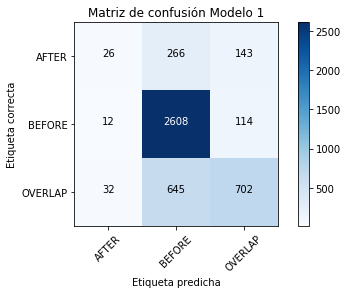

In [22]:
# modelo 1
y_true, y_pred = y_test, model.predict(X_test)
plot_confusion_matrix(confusion_matrix(y_true, y_pred),
                      classes=['AFTER', 'BEFORE', 'OVERLAP'], 
                      title="Matriz de confusión Modelo 1")

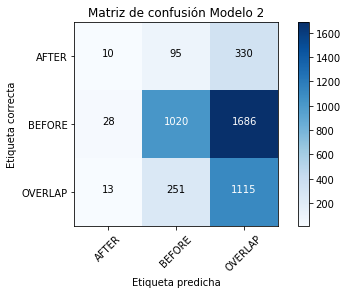

In [23]:
# modelo 2
y_true, y_pred = y_test, model_2.predict(X_test)
plot_confusion_matrix(confusion_matrix(y_true, y_pred),
                      classes=['AFTER', 'BEFORE', 'OVERLAP'], 
                      title="Matriz de confusión Modelo 2")

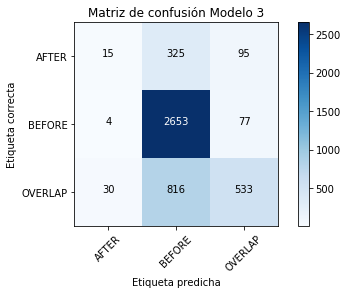

In [24]:
# modelo 3
y_true, y_pred = y_test, model_3.predict(X_test)
plot_confusion_matrix(confusion_matrix(y_true, y_pred),
                      classes=['AFTER', 'BEFORE', 'OVERLAP'], 
                      title="Matriz de confusión Modelo 3")

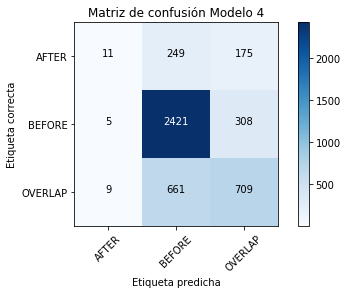

In [25]:
# modelo 4
y_true, y_pred = y_test, model_4.predict(X_test)
plot_confusion_matrix(confusion_matrix(y_true, y_pred),
                      classes=['AFTER', 'BEFORE', 'OVERLAP'], 
                      title="Matriz de confusión Modelo 4")

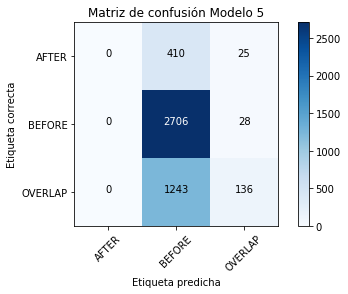

In [26]:
# modelo 5
y_true, y_pred = y_test, model_5.predict(X_test)
plot_confusion_matrix(confusion_matrix(y_true, y_pred),
                      classes=['AFTER', 'BEFORE', 'OVERLAP'], 
                      title="Matriz de confusión Modelo 5")

### Cuál es la clase con mejor perfomance?, y la peor?
Ningun modelo dio buenos resultados, se observan valores altos fuera de la diagonal.

La clase mejor clasificada es la clase "BEFORE" en todos los modelos. Esta clase tiene el mayor soporte y el mejor f1-score en todos los modelos.

La clase peor clasificada es la clase "AFTER". Esta clase tiene el ,enor soporte y el peor f1-score en todos los modelos.

Necesitamos mas muestras de train para las clases "AFTER" y "OVERLAP" y asi tener mejor balanceo.